1. Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary
Input using Sigmoid activation. Verify the number of learnable parameters in the model.

XORModel(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)
Epoch [1000/10000], Loss: 0.0015
Epoch [2000/10000], Loss: 0.0001
Epoch [3000/10000], Loss: 0.0000
Epoch [4000/10000], Loss: 0.0000
Epoch [5000/10000], Loss: 0.0000
Epoch [6000/10000], Loss: 0.0000
Epoch [7000/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [9000/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000


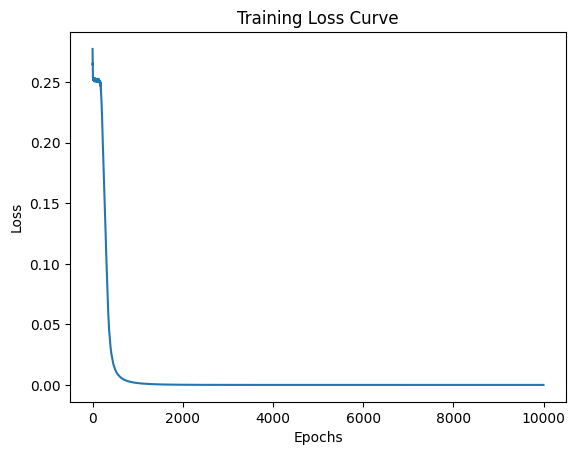

Input: [0. 0.], Predicted Output: [1.030104e-05]
Input: [0. 1.], Predicted Output: [0.99999034]
Input: [1. 0.], Predicted Output: [0.99998724]
Input: [1. 1.], Predicted Output: [9.622092e-06]

Learnable parameters of the model:
hidden.weight: tensor([[-11.4905,  12.1868],
        [-13.7866,  12.8981]])
hidden.bias: tensor([ 5.4429, -6.5901])
output.weight: tensor([[-22.9366,  23.2046]])
output.bias: tensor([11.3227])

Total number of learnable parameters: 9


In [5]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

torch.manual_seed(42)

# Step 1: Define XOR truth table as tensors
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)  # Reshaping Y to be a column vector


# Step 2: Define the XORModel class
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 2)  
        self.output = nn.Linear(2, 1)  

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Apply Sigmoid activation to hidden layer
        x = torch.sigmoid(self.output(x))  # Apply Sigmoid activation to output layer
        return x


class MyDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]


# Step 4: Create DataLoader
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

model = XORModel()
print(model)

loss_fn = torch.nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)  # Stochastic Gradient Descent optimizer

epochs = 10000
loss_list = []  # List to store loss values for plotting

for epoch in range(epochs):
    total_loss = 0
    for inputs, targets in train_data_loader:
        inputs, targets = inputs, targets
        # Zero the gradients

        # Forward pass
        predictions = model(inputs)

        # Compute the loss
        loss = loss_fn(predictions, targets)
        optimizer.zero_grad()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Store the average loss for this epoch
    loss_list.append(total_loss / len(train_data_loader))

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_data_loader):.4f}')

# Step 8: Plot the loss curve
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Step 9: Model Inference (Test the model)
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    for inputs in X:
        inputs = inputs  # Move input to device
        output = model(inputs)
        print(f'Input: {inputs.cpu().numpy()}, Predicted Output: {output.cpu().numpy()}')

# Step 10: Verify and print all learnable parameters
print("\nLearnable parameters of the model:")

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

# Number of learnable parameters
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'\nTotal number of learnable parameters: {params}')

2. Repeat Qn 1 by modifying the activation function to ReLU.

XORModel(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)
Epoch [1000/10000], Loss: 0.1262
Epoch [2000/10000], Loss: 0.1285
Epoch [3000/10000], Loss: 0.1273
Epoch [4000/10000], Loss: 0.1260
Epoch [5000/10000], Loss: 0.1266
Epoch [6000/10000], Loss: 0.1256
Epoch [7000/10000], Loss: 0.1265
Epoch [8000/10000], Loss: 0.1260
Epoch [9000/10000], Loss: 0.1259
Epoch [10000/10000], Loss: 0.1264


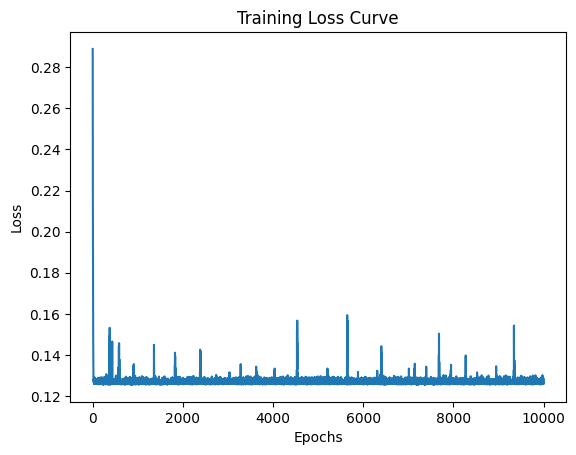

Input: [0. 0.], Predicted Output: [0.50341344]
Input: [0. 1.], Predicted Output: [1.0012332]
Input: [1. 0.], Predicted Output: [0.50341344]
Input: [1. 1.], Predicted Output: [0.]

Learnable parameters of the model:
hidden.weight: tensor([[ 0.9927,  1.1733],
        [-1.2904,  1.1960]])
hidden.bias: tensor([-1.2410, -0.1982])
output.weight: tensor([[-0.6593,  0.4989]])
output.bias: tensor([0.5034])

Total number of learnable parameters: 9


In [6]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

torch.manual_seed(42)

# Step 1: Define XOR truth table as tensors
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)  # Reshaping Y to be a column vector


# Step 2: Define the XORModel class
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 2)  
        self.output = nn.Linear(2, 1)  

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Apply relu activation to hidden layer
        x = torch.relu(self.output(x))  # Apply relu activation to output layer
        return x


class MyDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]


# Step 4: Create DataLoader
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

model = XORModel()
print(model)

loss_fn = torch.nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)  # Stochastic Gradient Descent optimizer

epochs = 10000
loss_list = []  # List to store loss values for plotting

for epoch in range(epochs):
    total_loss = 0
    for inputs, targets in train_data_loader:
        inputs, targets = inputs, targets
        # Zero the gradients

        # Forward pass
        predictions = model(inputs)

        # Compute the loss
        loss = loss_fn(predictions, targets)
        optimizer.zero_grad()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Store the average loss for this epoch
    loss_list.append(total_loss / len(train_data_loader))

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_data_loader):.4f}')

# Step 8: Plot the loss curve
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Step 9: Model Inference (Test the model)
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    for inputs in X:
        inputs = inputs  # Move input to device
        output = model(inputs)
        print(f'Input: {inputs.cpu().numpy()}, Predicted Output: {output.cpu().numpy()}')

# Step 10: Verify and print all learnable parameters
print("\nLearnable parameters of the model:")

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

# Number of learnable parameters
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'\nTotal number of learnable parameters: {params}')

4. Implement Feed Forward Neural Network with two hidden layers for classifying
handwritten digits using MNIST dataset. Display the classification accuracy in the form
of a Confusion matrix. Verify the number of learnable parameters in the model. 

Epoch [1/5], Loss: 2.2874, Accuracy: 19.49%
Epoch [2/5], Loss: 2.1405, Accuracy: 33.05%
Epoch [3/5], Loss: 1.9173, Accuracy: 61.57%
Epoch [4/5], Loss: 1.7661, Accuracy: 74.49%
Epoch [5/5], Loss: 1.6665, Accuracy: 85.46%


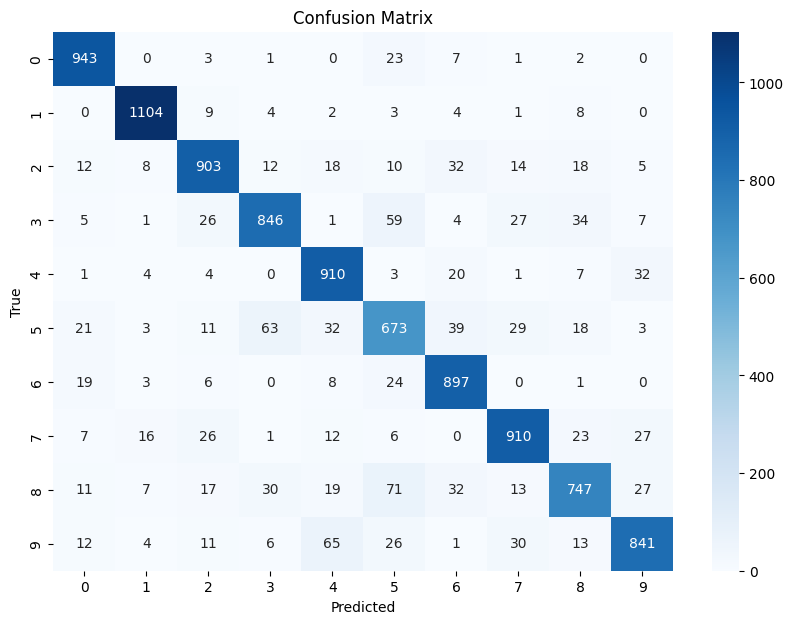

Total number of learnable parameters: 109386


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
torch.manual_seed(42)

# Step 1: Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Step 2: Define the Feedforward Neural Network with 2 hidden layers
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 28x28 input images, 128 neurons in hidden layer 1
        self.fc2 = nn.Linear(128, 64)  # 128 neurons from the previous layer, 64 neurons in hidden layer 2
        self.fc3 = nn.Linear(64, 10)  # 64 neurons from the previous layer, 10 output neurons (digits 0-9)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # Softmax activation for multi-class classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input images
        x = torch.relu(self.fc1(x))  # Apply ReLU to first hidden layer
        
        # replaced with self.relu up and down

        x = torch.relu(self.fc2(x))  # Apply ReLU to second hidden layer
        x = self.fc3(x)  # Output layer
        return self.softmax(x)


# Step 3: Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Automatically detect GPU or CPU
model = FeedForwardNN()  # Move model to device

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs, labels  # Move inputs and labels to device

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters

        running_loss += loss.item()  # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print loss and accuracy for each epoch
    print(
        f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Step 5: Evaluate the model and display confusion matrix
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels  # Move inputs and labels to device
        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        y_true.extend(labels.cpu().numpy())  # Move labels back to CPU
        y_pred.extend(predicted.cpu().numpy())  # Move predictions back to CPU

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 6: Verify the number of learnable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")

Epoch [1/5], Loss: 2.2874, Accuracy: 19.49%
Epoch [2/5], Loss: 2.1405, Accuracy: 33.05%
Epoch [3/5], Loss: 1.9173, Accuracy: 61.57%
Epoch [4/5], Loss: 1.7661, Accuracy: 74.49%
Epoch [5/5], Loss: 1.6665, Accuracy: 85.46%


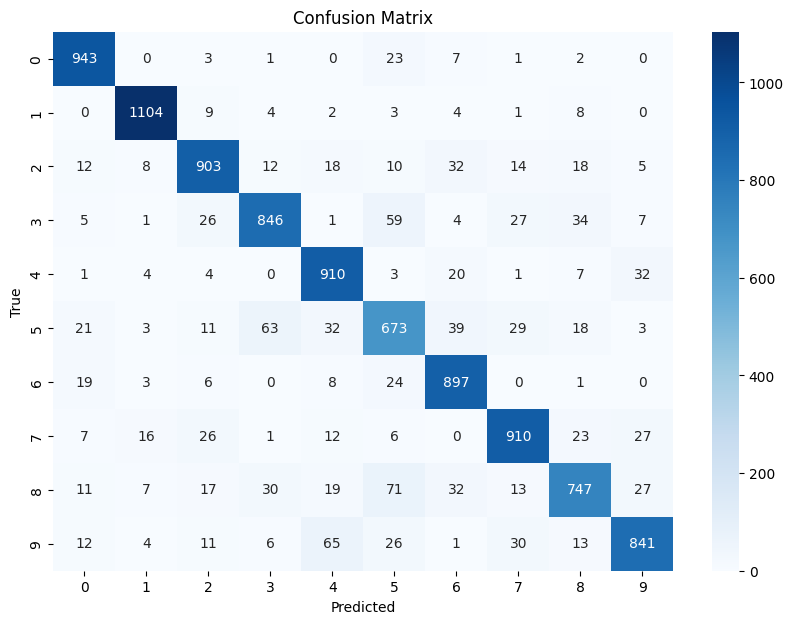

Total number of learnable parameters: 109386


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
torch.manual_seed(42)

# Step 1: Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Step 2: Define the Feedforward Neural Network with 2 hidden layers
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 28x28 input images, 128 neurons in hidden layer 1
        self.fc2 = nn.Linear(128, 64)  # 128 neurons from the previous layer, 64 neurons in hidden layer 2
        self.fc3 = nn.Linear(64, 10)  # 64 neurons from the previous layer, 10 output neurons (digits 0-9)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # Softmax activation for multi-class classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input images
        x = self.relu(self.fc1(x))  # Apply ReLU to first hidden layer
        x = self.relu(self.fc2(x))  # Apply ReLU to second hidden layer
        x = self.fc3(x)  # Output layer
        return self.softmax(x)


# Step 3: Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Automatically detect GPU or CPU
model = FeedForwardNN()  # Move model to device

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs, labels  # Move inputs and labels to device

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters

        running_loss += loss.item()  # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print loss and accuracy for each epoch
    print(
        f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Step 5: Evaluate the model and display confusion matrix
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels  # Move inputs and labels to device
        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        y_true.extend(labels.cpu().numpy())  # Move labels back to CPU
        y_pred.extend(predicted.cpu().numpy())  # Move predictions back to CPU

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 6: Verify the number of learnable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")